In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
file_paths = []
folder_file_paths = []

for root, dirs, files in os.walk('drive/MyDrive/Task 2 Data'):
    # Iterate over files in the current directory
    for file in files:
      if file.lower().endswith('.csv'):
    #     # Construct the full path to the file
        file_path = os.path.join(root, file)
        # Append the file path to the list
        folder_file_paths.append(file_path)
        folder_file_paths.sort()
    file_paths.append(folder_file_paths)
    folder_file_paths = []

In [4]:
file_paths=list(filter(None,file_paths))

EO = []
EC = []

for files in file_paths:
  for csv_file in files:
    if 'EO' in csv_file:
      EO.append(csv_file)
    else:
      EC.append(csv_file)

In [5]:
EO

['drive/MyDrive/Task 2 Data/Stage 4/EO/f1.csv',
 'drive/MyDrive/Task 2 Data/Stage 4/EO/f2.csv',
 'drive/MyDrive/Task 2 Data/Stage 4/EO/f3.csv',
 'drive/MyDrive/Task 2 Data/Stage 4/EO/f4.csv',
 'drive/MyDrive/Task 2 Data/Stage 4/EO/f5.csv',
 'drive/MyDrive/Task 2 Data/Stage 4/EO/f6.csv',
 'drive/MyDrive/Task 2 Data/Stage 0/EO/f1.csv',
 'drive/MyDrive/Task 2 Data/Stage 0/EO/f2.csv',
 'drive/MyDrive/Task 2 Data/Stage 0/EO/f3.csv',
 'drive/MyDrive/Task 2 Data/Stage 0/EO/f4.csv',
 'drive/MyDrive/Task 2 Data/Stage 0/EO/f5.csv',
 'drive/MyDrive/Task 2 Data/Stage 0/EO/f6.csv',
 'drive/MyDrive/Task 2 Data/Stage 3/EO/f1.csv',
 'drive/MyDrive/Task 2 Data/Stage 3/EO/f2.csv',
 'drive/MyDrive/Task 2 Data/Stage 3/EO/f3.csv',
 'drive/MyDrive/Task 2 Data/Stage 3/EO/f4.csv',
 'drive/MyDrive/Task 2 Data/Stage 3/EO/f5.csv',
 'drive/MyDrive/Task 2 Data/Stage 3/EO/f6.csv',
 'drive/MyDrive/Task 2 Data/Stage 2/EO/f1.csv',
 'drive/MyDrive/Task 2 Data/Stage 2/EO/f2.csv',
 'drive/MyDrive/Task 2 Data/Stage 2/EO/f

In [6]:
stage_2_eo = [features for features in EO if 'Stage 2' in features]
stage_3_eo = [features for features in EO if 'Stage 3' in features]
stage_4_eo = [features for features in EO if 'Stage 4' in features]

In [7]:
stage_2_ec = [features for features in EC if 'Stage 2' in features]
stage_3_ec = [features for features in EC if 'Stage 3' in features]
stage_4_ec = [features for features in EC if 'Stage 4' in features]

Next we need to merge stage 0 and 1 files(EO and EC seperately) into a single Dataframe and give labels according to the Stage

In [8]:
EO_train_data = [features for features in EO if 'Stage 0' in features or 'Stage 1' in features]
EC_train_data = [features for features in EC if 'Stage 0' in features or 'Stage 1' in features]

In [9]:
for items in EO_train_data:
  df = pd.read_csv(items)
  print(df.shape)

(30, 38)
(30, 38)
(30, 38)
(30, 38)
(30, 38)
(30, 38)
(11, 38)
(11, 38)
(11, 38)
(11, 38)
(11, 38)
(11, 38)


In [10]:
file_list = []
for csv_file in EO_train_data:
  if 'Stage 0' in csv_file:
    temp = pd.read_csv(csv_file,header=None)
    temp['label'] = 0
  else:
    temp = pd.read_csv(csv_file,header=None)
    temp['label'] = 1
  file_list.append(temp)

EO_df = pd.concat(file_list,ignore_index=True,axis=0)

<Axes: xlabel='label'>

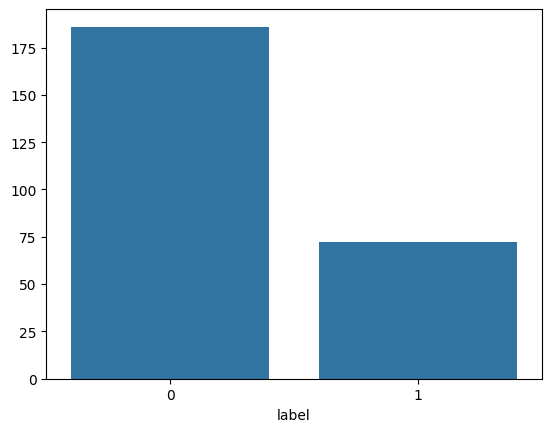

In [11]:
lst = EO_df['label'].value_counts()
sns.barplot(x=lst.index,y=lst.values)

<Axes: xlabel='label'>

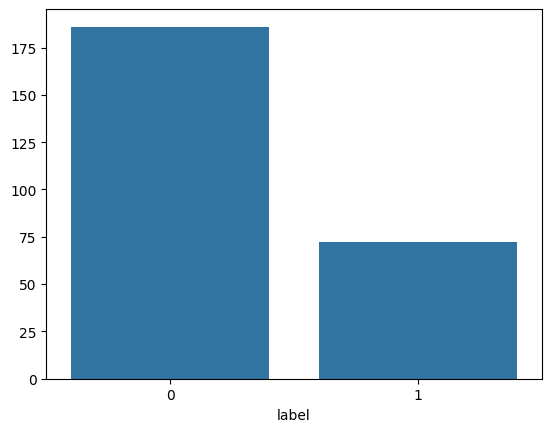

In [12]:
file_list = []
for csv_file in EC_train_data:
  if 'Stage 0' in csv_file:
    temp = pd.read_csv(csv_file,header=None)
    temp['label'] = 0
  else:
    temp = pd.read_csv(csv_file,header=None)
    temp['label'] = 1
  file_list.append(temp)

EC_df = pd.concat(file_list,ignore_index=True,axis=0)

lst = EC_df['label'].value_counts()
sns.barplot(x=lst.index,y=lst.values)

For EO

In [13]:
X = EO_df.drop(['label'],axis=1)
y = EO_df['label']
sampler = RandomOverSampler()
X,y= sampler.fit_resample(X,y)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [15]:
rf_classifier = Pipeline([('classifier',RandomForestClassifier(random_state=42))])

Mn_naive_classifier = Pipeline([('classifier',MultinomialNB())])

lgbm_classifier = Pipeline([('classifier',LGBMClassifier(random_state=42,verbosity=-1))])

lsvc_classifier = Pipeline([('classifier',LinearSVC(random_state=42,verbose=False))])

svc_classifier = Pipeline([('classifier',SVC(kernel='rbf',random_state=42))])

pipelines = [rf_classifier,Mn_naive_classifier,lgbm_classifier,lsvc_classifier,svc_classifier]

In [16]:
def check_model_metrics(model_pipelines):
  for model in model_pipelines:
    model.fit(x_train,y_train)
    print(model.named_steps['classifier'])
    print('accuracy',accuracy_score(y_test,model.predict(x_test)))
    print('precision',precision_score(y_test,model.predict(x_test)))
    print('recall score',recall_score(y_test,model.predict(x_test)))
    print('f1_score',f1_score(y_test,model.predict(x_test)))
    print('\n')

In [17]:
check_model_metrics(pipelines)

RandomForestClassifier(random_state=42)
accuracy 0.9032258064516129
precision 0.8363636363636363
recall score 1.0
f1_score 0.9108910891089108


MultinomialNB()
accuracy 0.6666666666666666
precision 0.6595744680851063
recall score 0.6739130434782609
f1_score 0.6666666666666667


LGBMClassifier(random_state=42, verbosity=-1)
accuracy 0.9139784946236559
precision 0.8518518518518519
recall score 1.0
f1_score 0.92


LinearSVC(random_state=42, verbose=False)
accuracy 0.7956989247311828
precision 0.7142857142857143
recall score 0.9782608695652174
f1_score 0.8256880733944955


SVC(random_state=42)
accuracy 0.7204301075268817
precision 0.6388888888888888
recall score 1.0
f1_score 0.7796610169491525




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
temp = []
for files in stage_2_eo:
  temp.append(pd.concat([pd.read_csv(files,header=None)],ignore_index=True,axis=0))

stage_2_eo_df = pd.concat(temp,ignore_index=True,axis=0)

temp = []
for files in stage_3_eo:
  temp.append(pd.concat([pd.read_csv(files,header=None)],ignore_index=True,axis=0))

stage_3_eo_df = pd.concat(temp,ignore_index=True,axis=0)

temp = []
for files in stage_4_eo:
  temp.append(pd.concat([pd.read_csv(files,header=None)],ignore_index=True,axis=0))

stage_4_eo_df = pd.concat(temp,ignore_index=True,axis=0)

stages = {'Stage 2 EO':stage_2_eo_df,'Stage 3 EO':stage_3_eo_df,'Stage 4 EO':stage_4_eo_df}

In [19]:
def classify_stage_points(model_pipelines,stages):
  for key,value in stages.items():
    print(key)
    for model in model_pipelines:
      unique_values,counts=np.unique(model.predict(value),return_counts=True)
      value_counts_dict = dict(zip(unique_values, counts))
      print(model.named_steps['classifier'],'\n',value_counts_dict)
    print('\n')

In [20]:
classify_stage_points(pipelines,stages)

Stage 2 EO
RandomForestClassifier(random_state=42) 
 {0: 76, 1: 80}
MultinomialNB() 
 {0: 53, 1: 103}
LGBMClassifier(random_state=42, verbosity=-1) 
 {0: 84, 1: 72}
LinearSVC(random_state=42, verbose=False) 
 {0: 44, 1: 112}
SVC(random_state=42) 
 {0: 18, 1: 138}


Stage 3 EO
RandomForestClassifier(random_state=42) 
 {0: 41, 1: 37}
MultinomialNB() 
 {0: 29, 1: 49}
LGBMClassifier(random_state=42, verbosity=-1) 
 {0: 43, 1: 35}
LinearSVC(random_state=42, verbose=False) 
 {0: 31, 1: 47}
SVC(random_state=42) 
 {0: 23, 1: 55}


Stage 4 EO
RandomForestClassifier(random_state=42) 
 {0: 21, 1: 15}
MultinomialNB() 
 {0: 9, 1: 27}
LGBMClassifier(random_state=42, verbosity=-1) 
 {0: 21, 1: 15}
LinearSVC(random_state=42, verbose=False) 
 {0: 8, 1: 28}
SVC(random_state=42) 
 {0: 3, 1: 33}




For EC

In [21]:
X = EC_df.drop(['label'],axis=1)
y = EC_df['label']
sampler = RandomOverSampler()
X,y= sampler.fit_resample(X,y)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [23]:
check_model_metrics(pipelines)

RandomForestClassifier(random_state=42)
accuracy 0.9032258064516129
precision 0.8627450980392157
recall score 0.9565217391304348
f1_score 0.9072164948453608


MultinomialNB()
accuracy 0.5806451612903226
precision 0.5614035087719298
recall score 0.6956521739130435
f1_score 0.6213592233009708


LGBMClassifier(random_state=42, verbosity=-1)
accuracy 0.9247311827956989
precision 0.8679245283018868
recall score 1.0
f1_score 0.9292929292929293


LinearSVC(random_state=42, verbose=False)
accuracy 0.8494623655913979
precision 0.7666666666666667
recall score 1.0
f1_score 0.8679245283018869


SVC(random_state=42)
accuracy 0.7204301075268817
precision 0.6785714285714286
recall score 0.8260869565217391
f1_score 0.7450980392156864




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
temp = []
for files in stage_2_ec:
  temp.append(pd.concat([pd.read_csv(files,header=None)],ignore_index=True,axis=0))

stage_2_ec_df = pd.concat(temp,ignore_index=True,axis=0)

temp = []
for files in stage_3_ec:
  temp.append(pd.concat([pd.read_csv(files,header=None)],ignore_index=True,axis=0))

stage_3_ec_df = pd.concat(temp,ignore_index=True,axis=0)

temp = []
for files in stage_4_ec:
  temp.append(pd.concat([pd.read_csv(files,header=None)],ignore_index=True,axis=0))

stage_4_ec_df = pd.concat(temp,ignore_index=True,axis=0)

stages = {'Stage 2 EC':stage_2_ec_df,'Stage 3 EC':stage_3_ec_df,'Stage 4 EC':stage_4_ec_df}

In [25]:
classify_stage_points(pipelines,stages)

Stage 2 EC
RandomForestClassifier(random_state=42) 
 {0: 97, 1: 59}
MultinomialNB() 
 {0: 65, 1: 91}
LGBMClassifier(random_state=42, verbosity=-1) 
 {0: 92, 1: 64}
LinearSVC(random_state=42, verbose=False) 
 {0: 47, 1: 109}
SVC(random_state=42) 
 {0: 42, 1: 114}


Stage 3 EC
RandomForestClassifier(random_state=42) 
 {0: 60, 1: 18}
MultinomialNB() 
 {0: 36, 1: 42}
LGBMClassifier(random_state=42, verbosity=-1) 
 {0: 69, 1: 9}
LinearSVC(random_state=42, verbose=False) 
 {0: 33, 1: 45}
SVC(random_state=42) 
 {0: 39, 1: 39}


Stage 4 EC
RandomForestClassifier(random_state=42) 
 {0: 23, 1: 19}
MultinomialNB() 
 {0: 17, 1: 25}
LGBMClassifier(random_state=42, verbosity=-1) 
 {0: 27, 1: 15}
LinearSVC(random_state=42, verbose=False) 
 {0: 14, 1: 28}
SVC(random_state=42) 
 {0: 6, 1: 36}


